# Portfolio Management: Additional Knowledge 01  
### Monte Carlo Simulation

Asset Returns are often assumed to follow a **random walk** that is: 
- follow a normal distribution 
- show Zero Serial Correlation
- show a Variance Proportional to Time  

To understand how Random Walk works it can be useful to code it!

$$
\frac{S_{t+dt} - S_t}{S_t} = \mu \, dt + \sigma \, \sqrt{dt} \, \xi_t
$$

In [5]:
import numpy as np
import pandas as pd     

In [8]:
def gbm(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu*dt + sigma * np.sqrt(dt) * xi 
    rets = pd.DataFrame(rets)
    # to prices 
    prices = s_0*(1+rets).cumprod()
    return prices

In [26]:
p = gbm(10, n_scenarios=3)

In [29]:
p.head()

,0,1,2
0,96.297509,97.526448,108.107015
1,92.492094,97.116060,112.551808
2,96.959999,100.352304,114.606595
3,104.037096,99.866512,112.786546
4,114.992352,94.222518,114.924501


<Axes: >

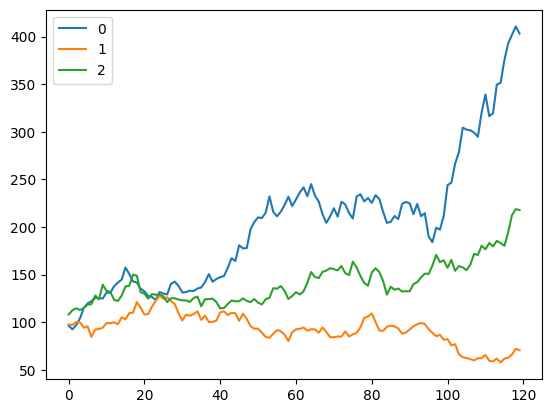

In [28]:
p.plot()

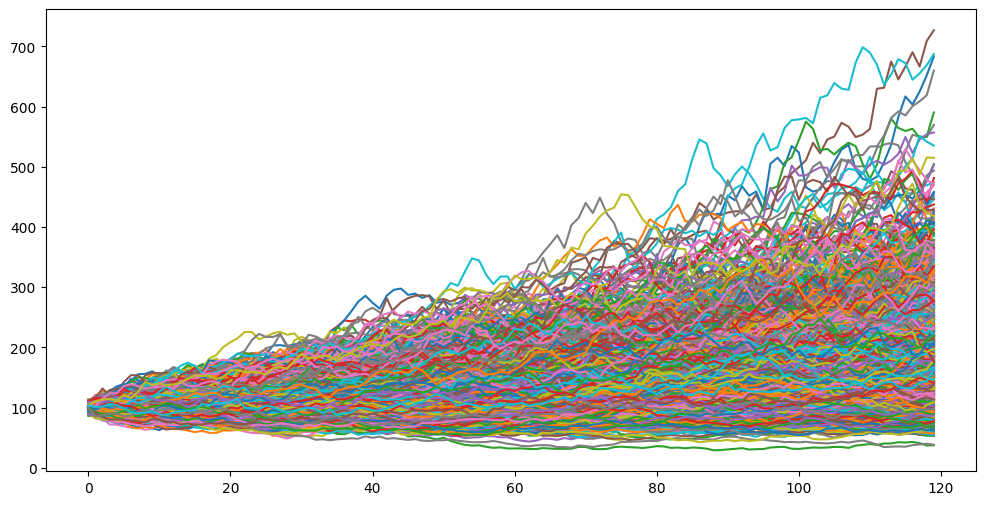

In [30]:
p = gbm(n_years=10, n_scenarios = 1000).plot(figsize=(12,6) , legend=False)